## Tarea Programación Avanzada

#### 1. Importar todas las librerías necesarias

In [86]:
import pandas as pd
import random
import matplotlib.pyplot as plt

#### 2. Inicializar algunas variables que después modificaremos.

In [87]:
hostnames =  []
dataset = []
df =None

#### 3. Crear una función para generar los hostnames en base a unas reglas

In [88]:
def set_hostnames(number_of_hosts: int) -> None: # Esta función cuando se ejecute no devolvera nada debido al None, simplemente realizara acciones
  # Definimos variables
  hostname_prefix = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10 # ['Linux'] 50% , ['Solaris'] 30% , ['AIX'] 20% , ['HP-UX'] 10%
  environment = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 # ['Development'] 10% , ['Integration'] 10% , ['Testing'] 25% , ['Staging'] 25% , ['Production'] 30%
  country = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30 # ['Norway'] 6% , ['France'] 9% , ['Italy'] 16% , ['Spain'] 16% , ['Germany'] 23% , ['Ireland'] 30%
  grupo_alpha = []

  for i in range(number_of_hosts): # un bulce for que se repetirá en función del numero de veces que le indiquemos
    hostname = random.choice(hostname_prefix) + random.choice(environment) + random.choice(country) # Vamos a generar de forma aleatoria las distintas variables teniendo en cuenta cada una de las porporciones y concatenandolo ejemplo: LIFRA003
    grupo_alpha.append(hostname) # Añadimos elementos generados aleatoriamente a la lista grupo_alpha
    hostname += str(grupo_alpha.count(hostname)).zfill(3) # Nos diga cuantas veces coinciden los tres elementos con tres digitos zfill(3)
    hostnames.append(hostname) # Añadimos a la lista hostnames todos los hostname generados

#### 4. Crear una función para obtener el nombre del Sistema Operativo

In [89]:
def get_os(hostname:str)-> str:
  # leyendo el código Ejemplo: LIFRA003 imprime un Sistema Operativo u otro en función de la letra inicial
  if hostname.startswith('L'):
    return 'Linux'
  elif hostname.startswith('S'):
    return 'Solaris'
  elif hostname.startswith('A'):
    return 'AIX'
  elif hostname.startswith('H'):
    return 'HP-UX'
  else:
    return 'Unknow'

#### 5. Crear una función para obtener el nombre del entorno.

In [90]:
def get_environment(hostname:str)-> str:
  # leyendo el código Ejemplo: LIFRA003 imprime un entorno u otro en función de la segunda letra
  hostname_environment = hostname[1] # Definimos nueva variable para seleccionar la primera letra

  if hostname_environment == ('D'):
    return 'Development'
  elif hostname_environment == ('I'):
    return 'Integration'
  elif hostname_environment == ('T'):
    return 'Testing'
  elif hostname_environment == ('S'):
    return 'Staging'
  elif hostname_environment == ('P'):
    return 'Production'
  else:
    return 'Unkown'

#### 6. Crear una función para obtener el nombre del país.



In [91]:
def get_country(hostname:str)-> str:
  # leyendo el código Ejemplo: LIFRA003 imprime un pais u otro en función de la segunda letra
  hostname_country = hostname[2:5] # Definimos nueva variable para seleccionar las letras correspondientes al país

  if hostname_country == ('NOR'):
    return 'Norway'
  elif hostname_country == ('FRA'):
    return 'France'
  elif hostname_country == ('ITA'):
    return 'Italy'
  elif hostname_country == ('ESP'):
    return 'Spain'
  elif hostname_country == ('DEU'):
    return 'Germany'
  elif hostname_country == ('IRL'):
    return 'Ireland'
  else:
    return 'Unkown'

#### 7. Crear una función para generar el DataFrame

In [92]:
def set_dataframe(count: int) -> None:
  global df # lo hacemos global para poder modificarlo, pues no lo habiamos definido como un df

  set_hostnames(count) # Vamos a generar el número de host names en función del int que le pasemos a la función set_dataframe, aplicando la función set_hostnames

  for hostname in hostnames: # puesto que ya se han generado los hostnames y se han añadido a la lista hostname, podemos aplicar este bulce for
     # a su vez añadimos a la lista data set como diccionario lo siguiente, aplicando las formulas para que nos genere cada elemento aleatorio
    dataset.append({
        'hostname': hostname,
        'os': get_os(hostname),
        'environment': get_environment(hostname),
        'country': get_country(hostname),
        'node': int(hostname[-3:])
      })
  df = pd.DataFrame(dataset) # definimos df convirtiendo la lista dataset generada mediante el bucle en un DataFrame de pandas




#### 8. Crear el DataFrame

In [93]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,LSFRA001,Linux,Staging,France,1
1,SSIRL001,Solaris,Staging,Ireland,1
2,LDNOR001,Linux,Development,Norway,1
3,LSESP001,Linux,Staging,Spain,1
4,SIDEU001,Solaris,Integration,Germany,1
...,...,...,...,...,...
1495,LDDEU008,Linux,Development,Germany,8
1496,LPDEU051,Linux,Production,Germany,51
1497,LSFRA018,Linux,Staging,France,18
1498,LTDEU036,Linux,Testing,Germany,36


#### 9. Guardar el DataFrame generado en un fichero CSV

In [94]:
df.to_csv('hosts.csv', header=True, index=False)

df_hostsnames = pd.read_csv('hosts.csv')
df_hostsnames # Nueva variable que se genera a raiz de leer el csv generado mediante el data frame df

,hostname,os,environment,country,node
0,LSFRA001,Linux,Staging,France,1
1,SSIRL001,Solaris,Staging,Ireland,1
2,LDNOR001,Linux,Development,Norway,1
3,LSESP001,Linux,Staging,Spain,1
4,SIDEU001,Solaris,Integration,Germany,1
...,...,...,...,...,...
1495,LDDEU008,Linux,Development,Germany,8
1496,LPDEU051,Linux,Production,Germany,51
1497,LSFRA018,Linux,Staging,France,18
1498,LTDEU036,Linux,Testing,Germany,36


#### 10. Generar un único gráfico, agrupado para cada país (country), los entornos (environment)

<Axes: xlabel='country'>

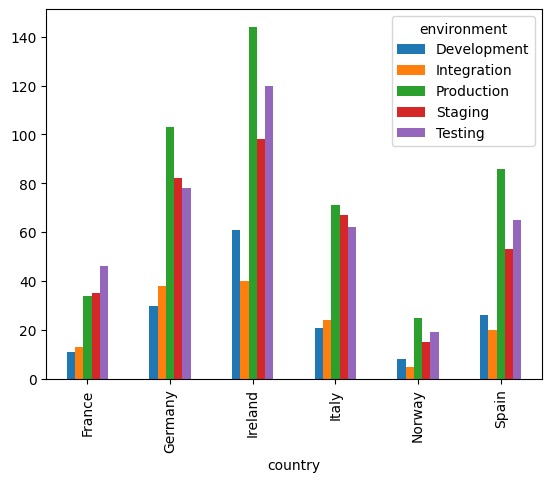

In [95]:
g = df.groupby([("country"),('environment')]).size()
g.unstack().plot(kind='bar')

#### 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.

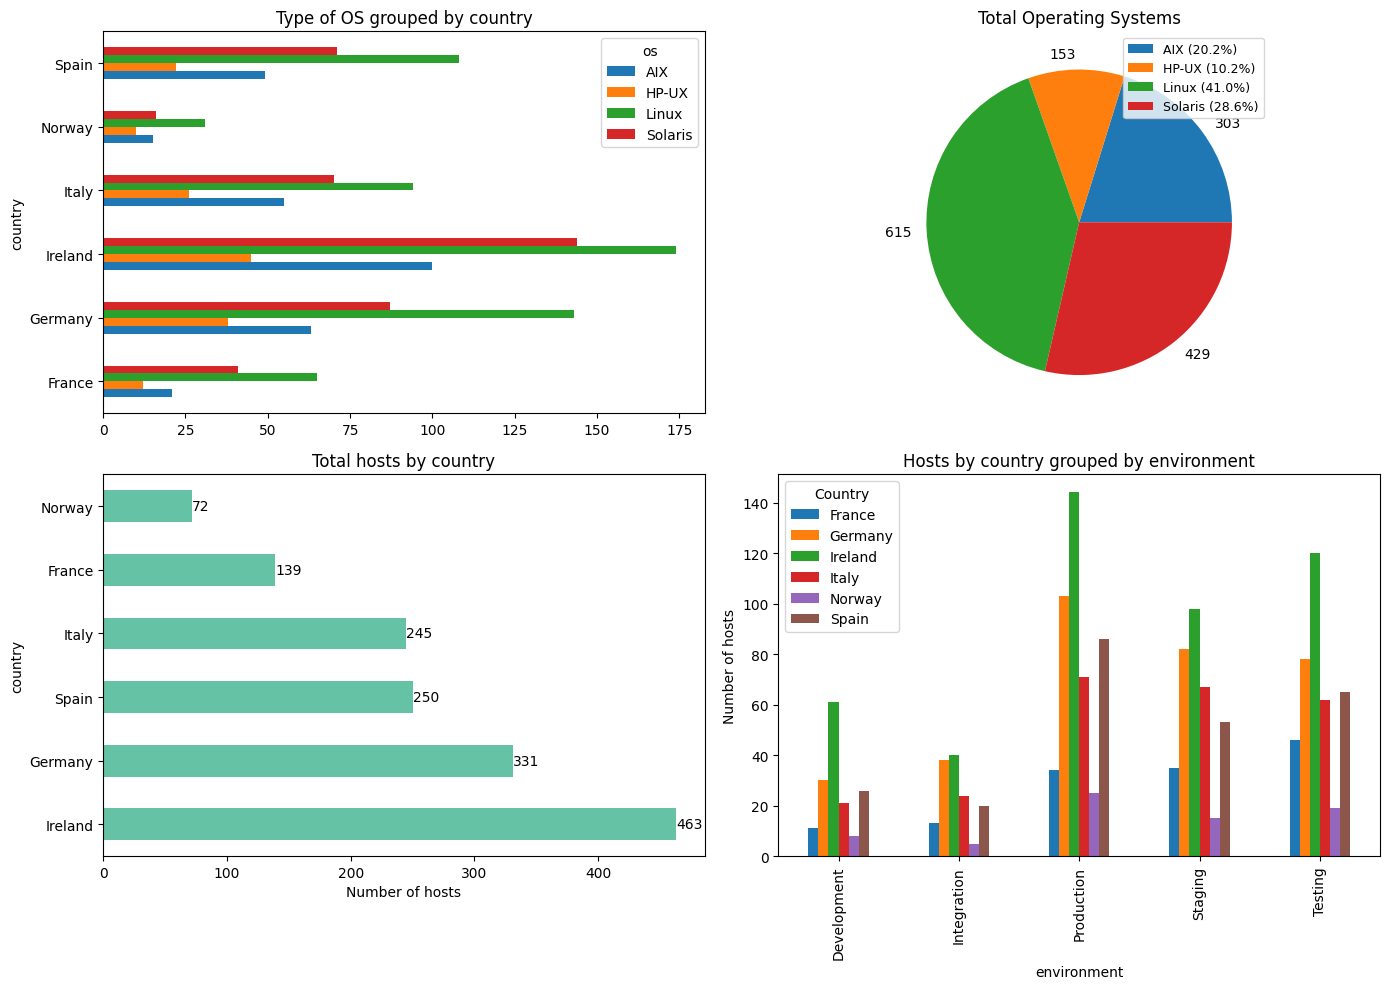

In [99]:
fig, axs= plt.subplots(2,2,figsize=(14,10))


df.groupby(['country','os']).size().unstack().plot(kind='barh',ax=axs[0,0])
axs[0, 0].set_title('Type of OS grouped by country')
axs[0,0].legend(title='os',loc='upper right', fontsize=10)

df.groupby('os').size().plot(kind='pie',ax=axs[0,1],labels=df.groupby('os').size()) # Falta porcentajes en la leyenda
axs[0,1].set_title('Total Operating Systems')
labels = df.groupby('os').size()
percentages = (labels / labels.sum()) * 100
labels = labels.index + ' (' + (percentages.round(2).astype(str) + '%')+')'
axs[0,1].legend(loc='upper right', fontsize=9, labels=labels)


df['country'].value_counts().plot(kind='barh',ax=axs[1,0],xlabel='Number of hosts',colormap = 'Set2')
axs[1,0].set_title('Total hosts by country')
axs[1,0].bar_label(df['country'].value_counts().plot(kind='barh',ax=axs[1,0],xlabel='Number of hosts',colormap = 'Set2').containers[0])

df.groupby(['country','environment']).size().unstack(0).plot(kind='bar',ax=axs[1,1],ylabel='Number of hosts')
axs[1,1].set_title('Hosts by country grouped by environment')
axs[1,1].legend(loc='upper left', fontsize=10,title='Country')

fig.tight_layout()

labels= df.groupby('os').size().index)